In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import dataprob
import copy

import linkage


#### Load experimental data

In [2]:

blank = linkage.experiment.Experiment("data/itc_blank_expt.csv",
                                      cell_contents={},
                                      syringe_contents={"ET":4e-3},
                                      cell_volume=201.3e-6,
                                      conc_to_float="ET")
blank.define_itc_observable(obs_column="obs_heat",
                            obs_std=1e-6)

binding = linkage.experiment.Experiment("data/itc_binding_expt.csv",
                                        cell_contents={"CT":0.5e-3},
                                        syringe_contents={"ET":3e-3},
                                        cell_volume=201.3e-6,
                                        conc_to_float="ET")
binding.define_itc_observable(obs_column="obs_heat",
                              obs_std=1e-6)


#### Create a linkage model

In [3]:
expt_list = [blank,binding] 

gm = linkage.GlobalModel(model_name="CaEDTA",
                         expt_list=expt_list)

#### Do fit

In [12]:
f = dataprob.setup(gm.model_normalized,
                   vector_first_arg=True,
                   fit_parameters=gm.parameter_names)

f.param_df.loc["KE","guess"] = 17
f.param_df.loc["KE","upper_bound"] = 25
f.param_df.loc["KE","lower_bound"] = 0

f.param_df.loc["nuisance_expt_0_ET_fudge","guess"] = 1.1
f.param_df.loc["nuisance_expt_0_ET_fudge","fixed"] = True

f.param_df.loc["nuisance_expt_1_ET_fudge","guess"] = 1.1
f.param_df.loc["nuisance_expt_1_ET_fudge","fixed"] = True

f.fit(y_obs=gm.y_obs_normalized,
      y_std=gm.y_std_normalized)

f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
KE,KE,17.268426,0.260890,16.746914,17.789939,17.0,False,0.0,25.0,NaN,NaN
dH_E,dH_E,-11074.855329,45.697703,-11166.203736,-10983.506923,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,-1.777205,32.914516,-67.572385,64.017976,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-inf,inf,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-inf,inf,NaN,NaN


In [13]:
f.fit_quality

,description,is_good,value,message
name,,,,
success,fit success status,True,True,
num_obs,number of observations,True,66,
num_param,number of fit parameters,True,3,There are 63 more observations than fit parame...
lnL,log likelihood,True,129.67464,
chi2,chi^2 goodness-of-fit,True,1.0,A p-value of 1.000e+00 for the a goodness-of-f...
reduced_chi2,reduced chi^2,False,0.280023,A reduced chi^2 value of 0.280 may mean the mo...
mean0_resid,t-test for residual mean != 0,True,0.189692,A p-value of 1.897e-01 for the one-sample t-te...
durbin-watson,Durbin-Watson test for correlated residuals,True,1.830258,A Durbin-Watson test-statistic of 1.830 is con...
ljung-box,Ljung-Box test for correlated residuals,True,0.998879,A p-value of 9.989e-01 for the Ljung-Box test ...


#### Plot results

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
KE,KE,17.268426,0.260890,16.746914,17.789939,17.0,False,0.0,25.0,NaN,NaN
dH_E,dH_E,-11074.855329,45.697703,-11166.203736,-10983.506923,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,-1.777205,32.914516,-67.572385,64.017976,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-inf,inf,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-inf,inf,NaN,NaN


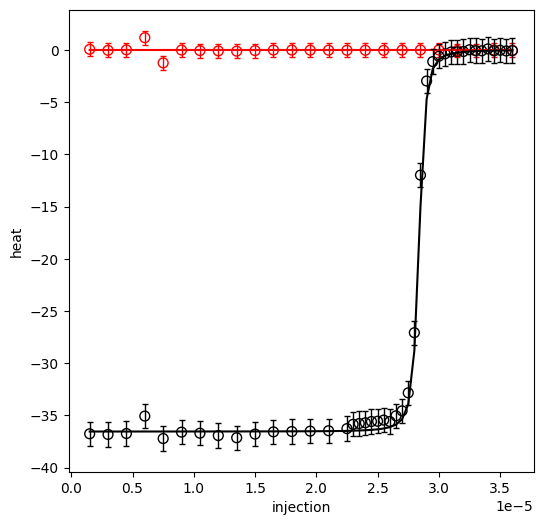

In [14]:
style = {"s":50,
         "facecolor":"none",
         "edgecolor":"black"}
err_style = {"lw":0,
             "elinewidth":1,
             "capsize":2}

color_order = ["red","black"]
fig, ax = plt.subplots(1,figsize=(6,6))

out_df = gm.as_df.copy()
y_calc = gm.model(np.array(f.fit_df["estimate"]))

for i in np.unique(out_df.expt_id):
    
    style["edgecolor"] = color_order[i]
    err_style["color"] = color_order[i]

    mask = out_df["expt_id"] == i
    this_df = out_df.loc[mask,:]
    
    x_values = np.cumsum(this_df["injection"])
    y_values = np.array(this_df["y_obs"])
    y_err = np.array(this_df["y_std"])/np.mean(this_df["injection"])
    this_y_calc = y_calc[mask]/this_df["injection"]

    y_values = y_values/this_df["injection"]
    
    ax.scatter(x_values,y_values,**style)
    ax.errorbar(x=x_values,
                y=y_values,
                yerr=y_err,
                **err_style)

    ax.plot(x_values,this_y_calc,'-',color=color_order[i])
    

plt.xlabel("injection")
plt.ylabel("heat")

f.fit_df

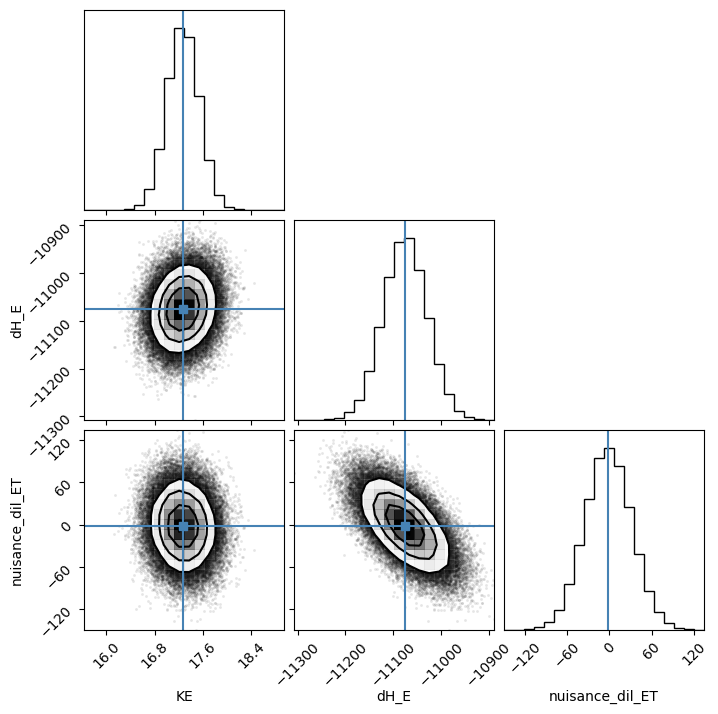

In [15]:
fig = dataprob.plot_corner(f)

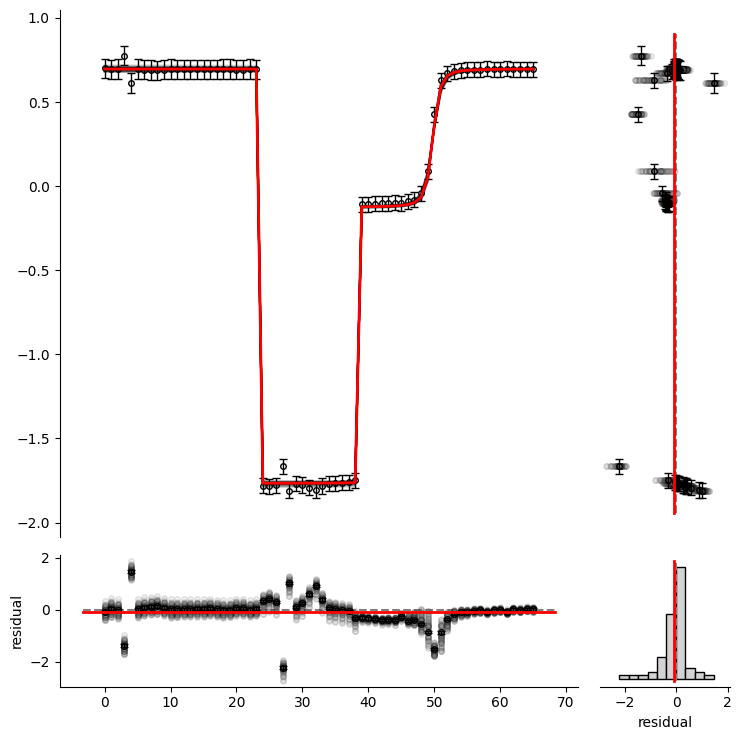

In [16]:
fig = dataprob.plot_summary(f)
